# Описание наборов данных

**Биржа NYSE (сектор здравоохранения - Healthcare).** 

**Выборка 1:** Признаки EPS Growth (TTM*), Sales Growth (TTM*), **Выборка 2:** Признаки Beta (1y), P/E Ratio. 

Компании, чья капитализация составляет больше 1 млрд. долларов США

**Trailing Twelve Months (TTM)*

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://finance.yahoo.com/research-hub/screener/most_actives/?start=0&count=100

Применила фильтры:

Exchange: NYSE, Sector: Healthcare, Market Cap (intraday): больше 1B

In [2]:
# список коротких названий компаний
ticker_list = ['PFE', 'HLN', 'MDT', 'CVS', 'MRK', 
               'TEVA', 'AVTR', 'BMY', 'ABT', 'AGL',
               'WRBY', 'BSX', 'TDOC', 'NVO', 'JNJ',
               'ABBV', 'NVS', 'OSCR', 'EW', 'GSK']

Среди полей не было P/E Ratio, наиболее близкое trailingPE

Trailing P/E Ratio is calculated by dividing a company's current share price by its most recent reported earnings per share (EPS)

In [3]:
# сохраняем нужные столбцы
data = []
for ticker in ticker_list:
    stock = yf.Ticker(ticker)
    info = stock.info
    
    eps_growth = info.get('earningsGrowth', np.nan)   # EPS Growth (TTM)
    sales_growth = info.get('revenueGrowth', np.nan)  # Sales Growth (TTM)
    beta = info.get('beta', np.nan)                   # Beta (1y)
    pe_ratio = info.get('trailingPE', np.nan)         # P/E Ratio
    market_cap = info.get('marketCap', 0) / 1e9       # Капитализация
    
    data.append({
        'Company': ticker,
        'EPS Growth (TTM)': eps_growth,
        'Sales Growth (TTM)': sales_growth,
        'Beta (1y)': beta,
        'P/E Ratio': pe_ratio,
        'MarketCap (B)': market_cap
    })
    
    print(ticker, " - ", info.get('shortName', 'N/A'))

PFE  -  Pfizer, Inc.
HLN  -  Haleon plc
MDT  -  Medtronic plc.
CVS  -  CVS Health Corporation
MRK  -  Merck & Company, Inc.
TEVA  -  Teva Pharmaceutical Industries 
AVTR  -  Avantor, Inc.
BMY  -  Bristol-Myers Squibb Company
ABT  -  Abbott Laboratories
AGL  -  agilon health, inc.
WRBY  -  Warby Parker Inc.
BSX  -  Boston Scientific Corporation
TDOC  -  Teladoc Health, Inc.
NVO  -  Novo Nordisk A/S
JNJ  -  Johnson & Johnson
ABBV  -  AbbVie Inc.
NVS  -  Novartis AG
OSCR  -  Oscar Health, Inc.
EW  -  Edwards Lifesciences Corporatio
GSK  -  GSK plc


In [4]:
# Этот код выводит все trailingPE, можно использовать для сравнения с тем, что есть на сайте
'''
for ticker in ticker_list:
    stock = yf.Ticker(ticker)
    info = stock.info
    
    # PE = stock's share price / the earnings per share (EPS)
    print(ticker, " - ", info.get('trailingPE', np.nan))
'''

'\nfor ticker in ticker_list:\n    stock = yf.Ticker(ticker)\n    info = stock.info\n    \n    # PE = stock\'s share price / the earnings per share (EPS)\n    print(ticker, " - ", info.get(\'trailingPE\', np.nan))\n'

In [5]:
# Этот код выводит всю информацию компании TEVA
'''
stock = yf.Ticker(ticker_list[4])
info = stock.info
print(info)
'''

'\nstock = yf.Ticker(ticker_list[4])\ninfo = stock.info\nprint(info)\n'

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head(20)

,Company,EPS Growth (TTM),Sales Growth (TTM),Beta (1y),P/E Ratio,MarketCap (B)
0,PFE,NaN,0.219,0.543,17.404257,139.177394
1,HLN,NaN,-0.003,0.227,24.829270,45.984891
2,MDT,0.019,0.025,0.823,26.978659,113.491968
3,CVS,-0.178,0.036,0.531,18.573770,85.709185
4,MRK,NaN,0.068,0.363,12.925817,220.068610
5,TEVA,NaN,-0.051,0.826,NaN,17.519895
6,AVTR,4.208,-0.021,1.301,15.192308,10.766468
7,BMY,-0.959,0.075,0.436,NaN,121.169953
8,ABT,4.794,0.072,0.693,17.236912,228.392600
9,AGL,NaN,0.442,0.677,NaN,1.682196


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             20 non-null     object 
 1   EPS Growth (TTM)    11 non-null     float64
 2   Sales Growth (TTM)  20 non-null     float64
 3   Beta (1y)           20 non-null     float64
 4   P/E Ratio           15 non-null     float64
 5   MarketCap (B)       20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


По параметрам P/E Ratio и EPS Growth есть много пропусков. Заполним недостающие значения данными с сайта ivesting.com. Заполним те, где был только 1 пропуск

In [9]:
df.at[0, 'EPS Growth (TTM)'] = 0.2776  # PFE
df.at[4, 'EPS Growth (TTM)'] = 4.5989 # MRK
# было ещё несколько с одним пропуском, но среди топ 300 на investing их не было..

In [10]:
df.head(20)

,Company,EPS Growth (TTM),Sales Growth (TTM),Beta (1y),P/E Ratio,MarketCap (B)
0,PFE,0.2776,0.219,0.543,17.404257,139.177394
1,HLN,NaN,-0.003,0.227,24.829270,45.984891
2,MDT,0.0190,0.025,0.823,26.978659,113.491968
3,CVS,-0.1780,0.036,0.531,18.573770,85.709185
4,MRK,4.5989,0.068,0.363,12.925817,220.068610
5,TEVA,NaN,-0.051,0.826,NaN,17.519895
6,AVTR,4.2080,-0.021,1.301,15.192308,10.766468
7,BMY,-0.9590,0.075,0.436,NaN,121.169953
8,ABT,4.7940,0.072,0.693,17.236912,228.392600
9,AGL,NaN,0.442,0.677,NaN,1.682196


Остальные выкидываем

In [11]:
df = df.dropna()

In [12]:
df.count()

Company               12
EPS Growth (TTM)      12
Sales Growth (TTM)    12
Beta (1y)             12
P/E Ratio             12
MarketCap (B)         12
dtype: int64

Разделим на две выборки

In [13]:
# 1: Признаки EPS Growth (TTM), Sales Growth (TTM)
# 2: Признаки Beta (1y), P/E Ratio
df1 = df[['Company', 'EPS Growth (TTM)', 'Sales Growth (TTM)']]
df2 = df[['Company', 'Beta (1y)', 'P/E Ratio']]

# Выявление аномалий

Методы:
1. Одноклассовый метод опорных векторов (SVM)
2. Эллиптическая оболочка (Elliptic Envelope)
3. Фактор локального выброса (Local outlier factor)
4. Изолированный лес (Isolation forest)

In [14]:
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

## Параметры 1

EPS Growth (TTM), Sales Growth (TTM)

### Параметры оценщиков, использованные для анализа

In [15]:
features = ['EPS Growth (TTM)', 'Sales Growth (TTM)']
X = df1[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

LocalOutlierFactor без параметра contamination плохо работал, на остальных методах значения параметров как будто не влияли. Возможно это из-за малого количества данных.

In [16]:
estimators = {
    'One-Class SVM': OneClassSVM(nu=0.1),
    'Elliptic Envelope': EllipticEnvelope(contamination=0.1),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors=11, contamination=0.1),
    'Isolation Forest': IsolationForest(contamination=0.1)
}

results = {}
for name, estimator in estimators.items():
    if name == 'Local Outlier Factor':
        results[name] = estimator.fit_predict(X_scaled)
    else:
        results[name] = estimator.fit(X_scaled).predict(X_scaled)

### Диаграммы разброса

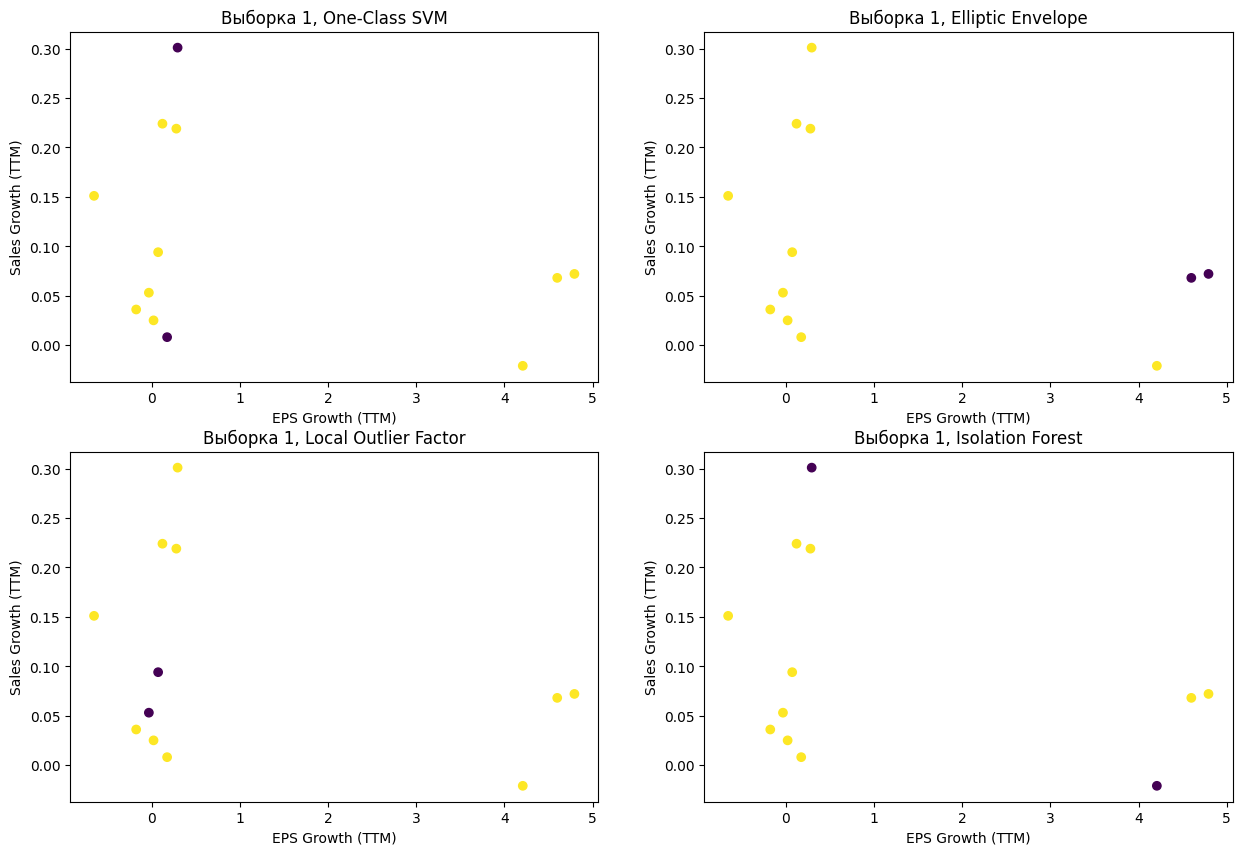

In [17]:
plt.figure(figsize=(15, 10))
for i, (name, pred) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=pred)
    plt.title("Выборка 1, " + name)
    plt.xlabel(features[0])
    plt.ylabel(features[1])

### Ансамблирование и подсчёт аномалий

In [18]:
ensemble_votes = np.array([results[name] for name in estimators.keys()]).T
ensemble_result = []
for row in ensemble_votes:
    outlier_count = np.sum(row == -1)
    if outlier_count >= 3:
        ensemble_result.append(3)  # Аномалия
    elif outlier_count == 2:
        ensemble_result.append(2)   # Подозрение 2
    elif outlier_count == 1:
        ensemble_result.append(1)   # Подозрение 1
    else:
        ensemble_result.append(0)   # Нормальные данные

In [19]:
df1['Ensemble'] = ensemble_result
anomalies = df1[df1['Ensemble'] == 3]['Company'].tolist()
suspicious2 = df1[df1['Ensemble'] == 2]['Company'].tolist()
suspicious1 = df1[df1['Ensemble'] == 1]['Company'].tolist()
print("Аномалии : ", anomalies)        # все выбрали как аномальное
print("Подозрительные для двоих: ", suspicious2)  # аномальным считают двое
print("Подозрительные для одного: ", suspicious1)  # аномальным считает хотя бы один

Аномалии :  []
Подозрительные для двоих:  ['NVO']
Подозрительные для одного:  ['MRK', 'AVTR', 'ABT', 'JNJ', 'EW', 'GSK']


C:\Users\Asus\AppData\Local\Temp\ipykernel_5332\2312458526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ensemble'] = ensemble_result


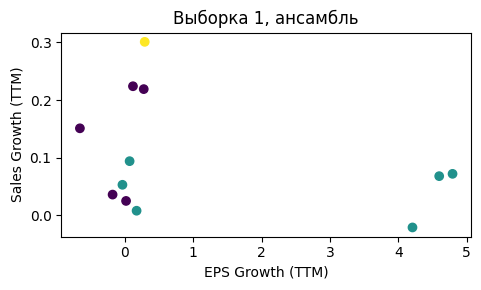

In [ ]:
# Визуализация ансамбля
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1], c = ensemble_result)
plt.title("Выборка 1, ансамбль")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.tight_layout()
plt.show()

## Параметры 2

Beta (1y), P/E Ratio

### Параметры оценщиков, использованные для анализа

In [21]:
features = ['P/E Ratio','Beta (1y)']
X = df2[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
estimators = {
    'One-Class SVM': OneClassSVM(nu=0.1),
    'Elliptic Envelope': EllipticEnvelope(contamination=0.1),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors=11, contamination=0.1),
    'Isolation Forest': IsolationForest(contamination=0.1)
}

results = {}
for name, estimator in estimators.items():
    if name == 'Local Outlier Factor':
        results[name] = estimator.fit_predict(X_scaled)
    else:
        results[name] = estimator.fit(X_scaled).predict(X_scaled)

### Диаграммы разброса

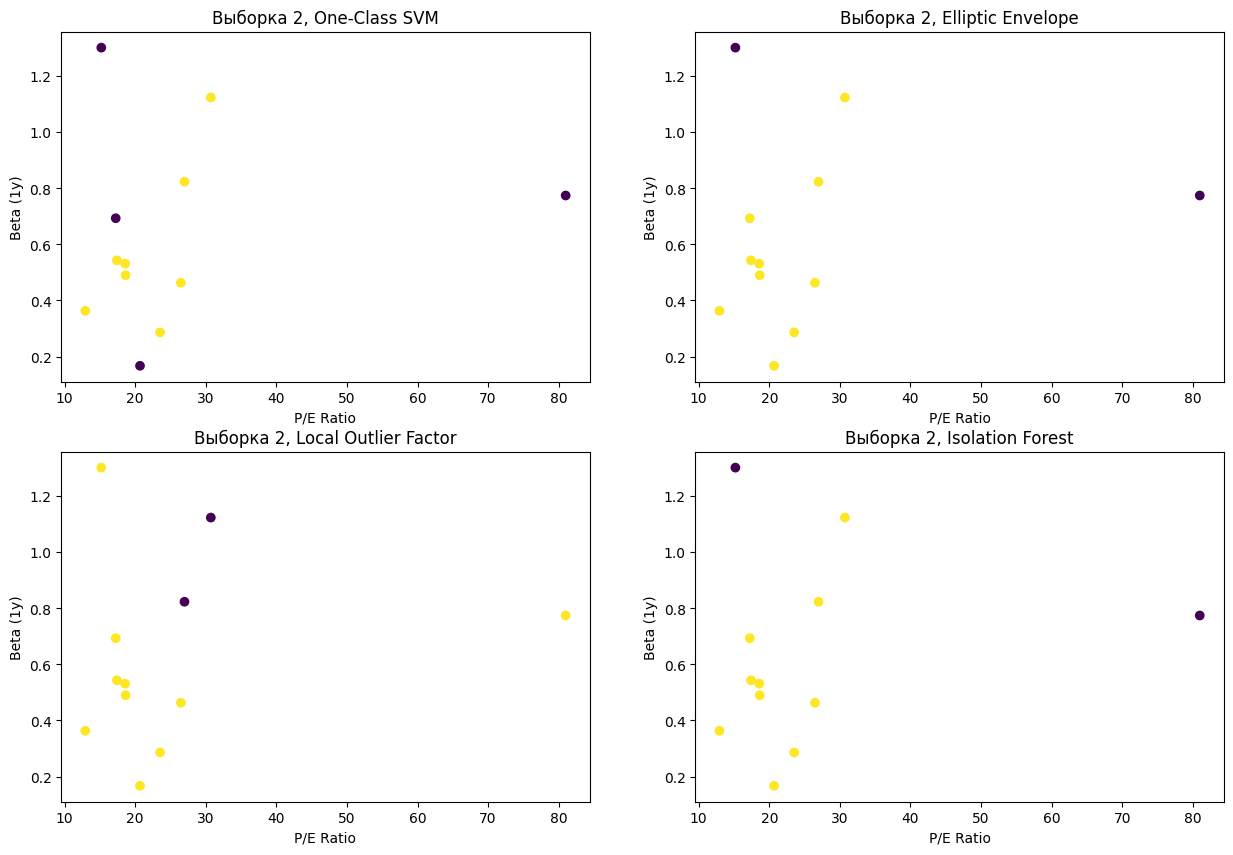

In [23]:
plt.figure(figsize=(15, 10))
for i, (name, pred) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=pred)
    plt.title("Выборка 2, " + name)
    plt.xlabel(features[0])
    plt.ylabel(features[1])

Интересно, что Local outlier factor не сочёл за аномальную правую одинокую точку. 

### Ансамблирование и подсчёт аномалий

In [24]:
ensemble_votes = np.array([results[name] for name in estimators.keys()]).T
ensemble_result = []
for row in ensemble_votes:
    outlier_count = np.sum(row == -1)
    if outlier_count >= 3:
        ensemble_result.append(3)  # Аномалия
    elif outlier_count == 2:
        ensemble_result.append(2)   # Подозрение 2
    elif outlier_count == 1:
        ensemble_result.append(1)   # Подозрение 1
    else:
        ensemble_result.append(0)   # Нормальные данные

In [25]:
df1['Ensemble'] = ensemble_result
anomalies = df1[df1['Ensemble'] == 3]['Company'].tolist()
suspicious2 = df1[df1['Ensemble'] == 2]['Company'].tolist()
suspicious1 = df1[df1['Ensemble'] == 1]['Company'].tolist()
print("Аномалии : ", anomalies)        # все выбрали как аномальное
print("Подозрительные для двоих: ", suspicious2)  # аномальным считают двое
print("Подозрительные для одного: ", suspicious1)  # аномальным считает хотя бы один

Аномалии :  ['AVTR', 'BSX']
Подозрительные для двоих:  []
Подозрительные для одного:  ['MDT', 'ABT', 'NVO', 'EW']


C:\Users\Asus\AppData\Local\Temp\ipykernel_5332\2312458526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Ensemble'] = ensemble_result


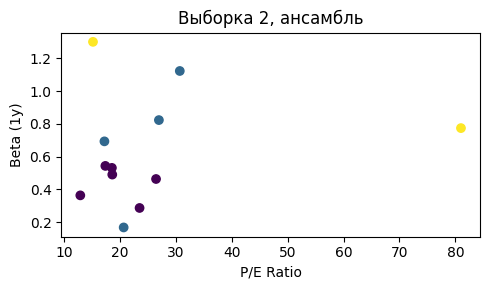

In [ ]:
# Визуализация ансамбля
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1], c = ensemble_result)
plt.title("Выборка 2, ансамбль")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.tight_layout()
plt.show()

# Выводы

**Результаты по параметрам EPS Growth (TTM), Sales Growth (TTM)**

* Аномалии :  []
* Подозрительные для двоих:  ['NVO']
* Подозрительные для одного:  ['MRK', 'AVTR', 'ABT', 'JNJ', 'EW', 'GSK']

**Результаты по параметрам P/E Ratio, Beta (1y)**

* Аномалии :  ['AVTR', 'BSX']
* Подозрительные для двоих:  []
* Подозрительные для одного:  ['MDT', 'ABT', 'NVO', 'EW']

По обеим группам параметров в выбросы/подозрения попали: AVTR, ABT, NVO, EW.